# Seaborn

## relplot(relational)

In [292]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [293]:
#Loading the working datasets with load_dataset from  https://github.com/mwaskom/seaborn-data repository
#and titanic.csv (available at Kaggle.com)
tips = sns.load_dataset("tips")

In [294]:
titanic= pd.read_csv("titanic.csv")
titanic["age"] = pd.to_numeric(titanic["age"],errors="coerce")

In [295]:
penguins = sns.load_dataset("penguins")

In [296]:
flights = sns.load_dataset("flights")

In [297]:
taxis = sns.load_dataset("taxis", parse_dates=["pickup","dropoff"])

In [298]:
# We can plot by using sns.relplot() or by selecting the kind of plot directly ex. sns.lineplot()
taxis["hour"] = taxis["pickup"].dt.hour
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,hour
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,17
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,9
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,17
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,22
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,10


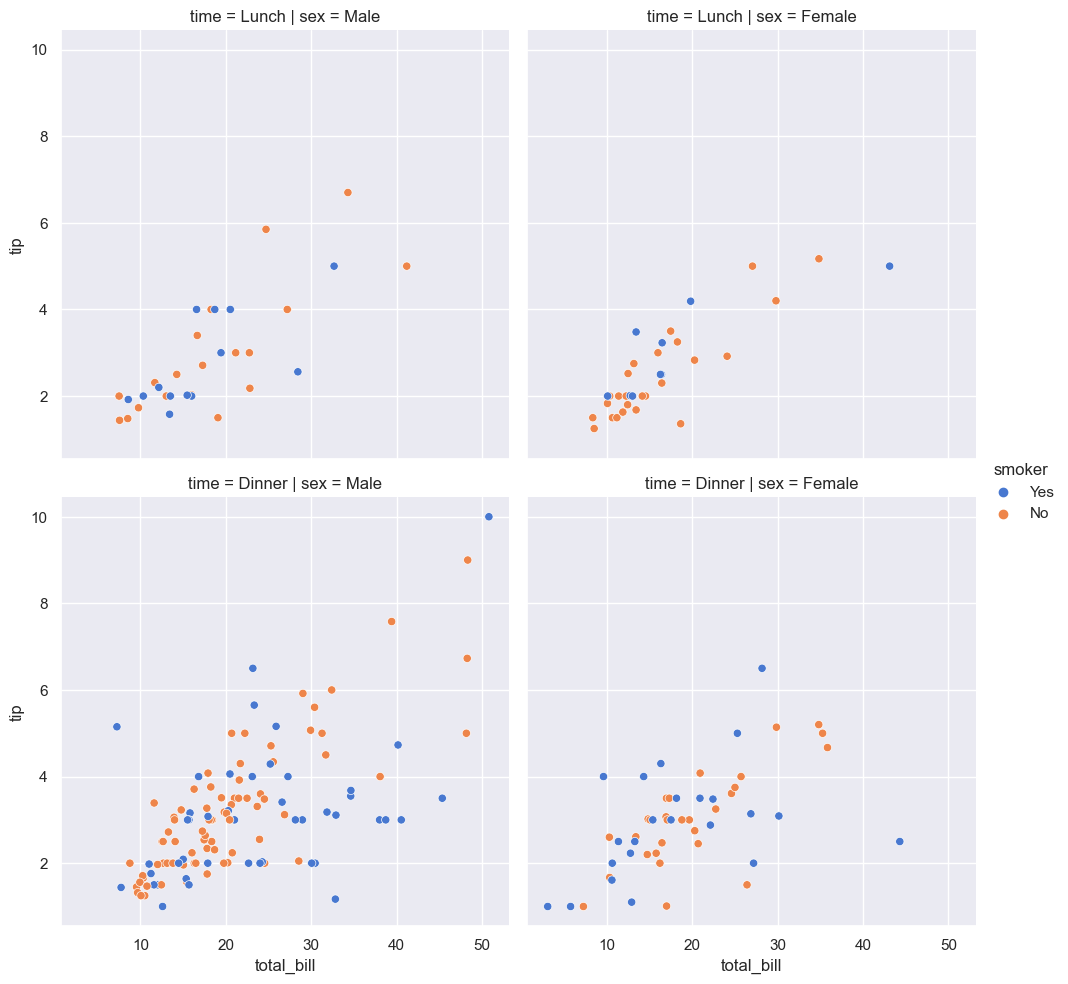

In [299]:
sns.relplot(data=tips,x="total_bill",y="tip",col="sex",hue="smoker",row="time")
plt.show()
#default kind="scatter", we can split columns and rows by attribute and color by attribute with hue="".

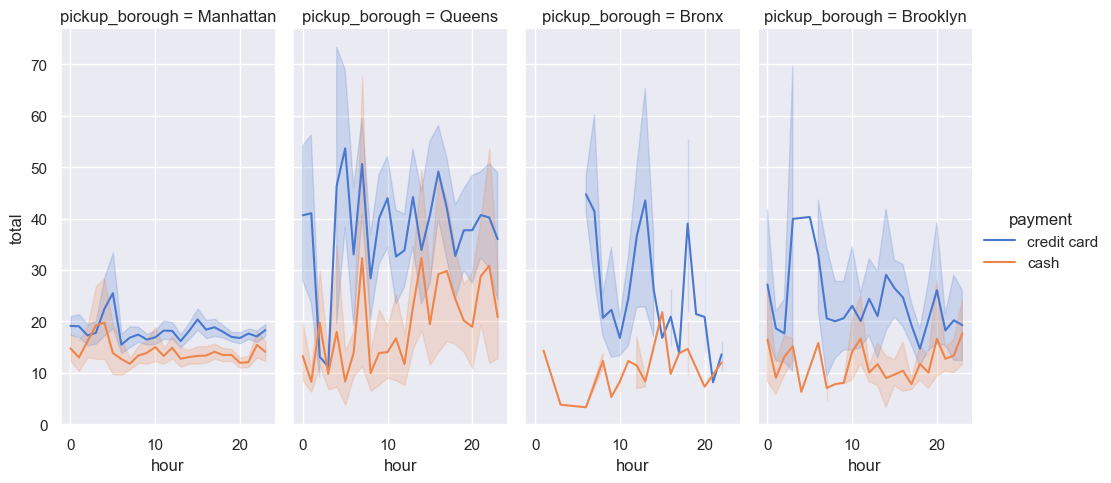

In [300]:
#we can control height and width with height and aspect arguments
sns.relplot(data=taxis,x="hour",
            y="total",
            kind="line",
            col="pickup_borough",
            hue="payment",
            height=5,
            aspect=0.5
           )
plt.show()

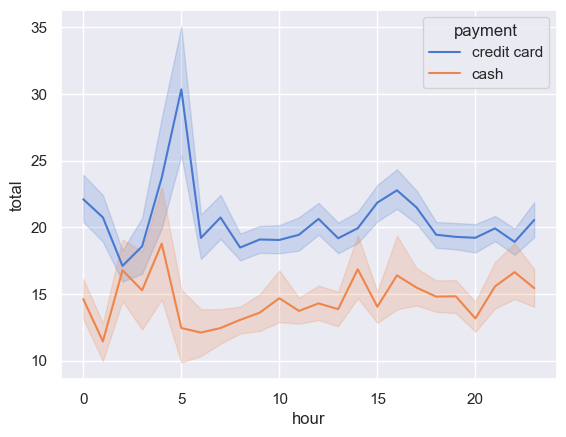

In [301]:
#if we wanted to use lineplot directly
#we can also set the confidence interval, the default is 95%
sns.lineplot(data=taxis,x="hour",y="total",hue="payment",ci=80)
plt.show()

## displot(distributions)

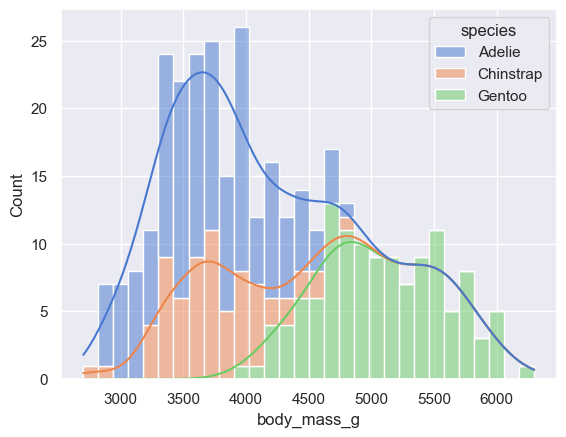

In [302]:
#We can call each plot by name or inside sns.displot(kind="") the same as in relplot
sns.histplot(data=penguins,x="body_mass_g",bins=30,hue="species",kde=True,multiple="stack")
plt.show()
#creating a histogram, setting the bins and fitting a kde plot over it.

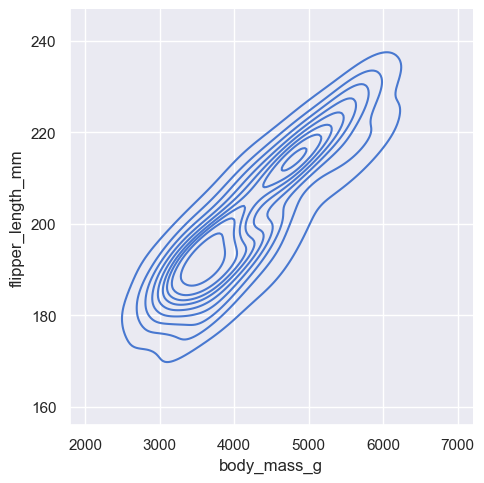

In [303]:
sns.displot(kind="kde",data=penguins,x="body_mass_g",y="flipper_length_mm")
plt.show()
#creating a bivariate kde plot through .displot()

## catplot(categorical)

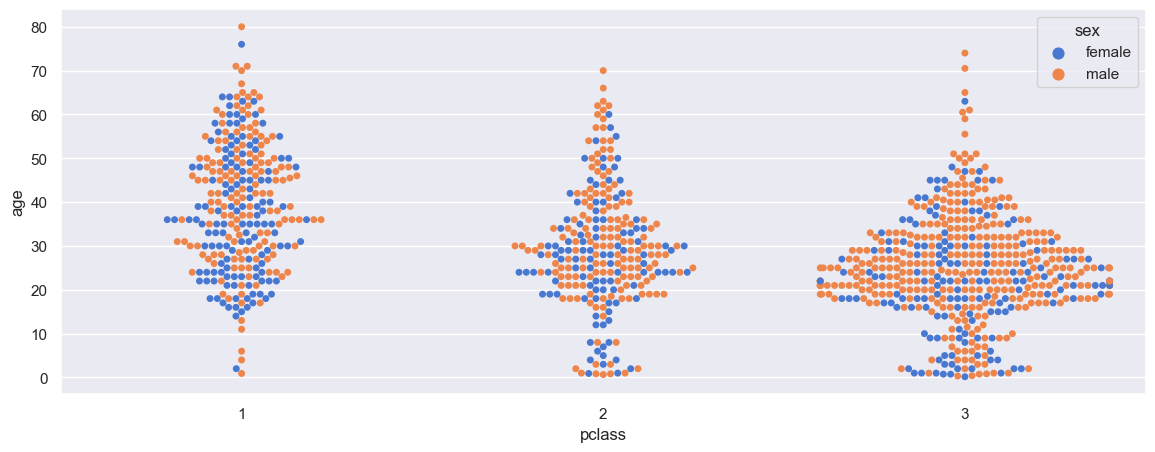

In [304]:
#Swarmplot
plt.figure(figsize=(14,5))
sns.swarmplot(data=titanic,x="pclass",y="age",hue="sex")
plt.show()
# X axis has categorical data
#swarm plots do not have the overlapping that strip plots have.

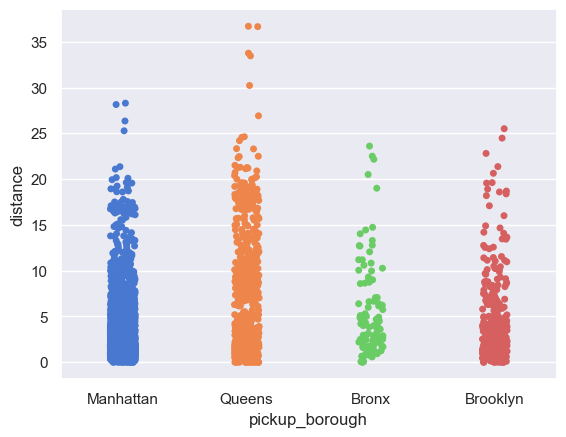

In [305]:
#stripplot
sns.stripplot(data=taxis,x="pickup_borough",y="distance")
plt.show()

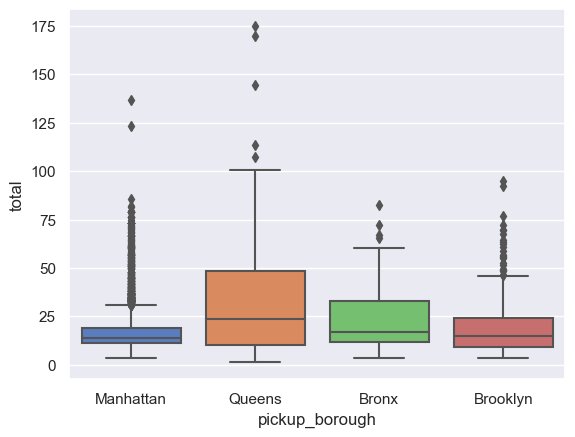

In [306]:
#Box plot with whiskers set at 1.5*IQR
#Through the box runs the median line and any values(dots) outside of the whiskers are outliers
sns.boxplot(data=taxis,x="pickup_borough",y="total",whis=1.5)
plt.show()

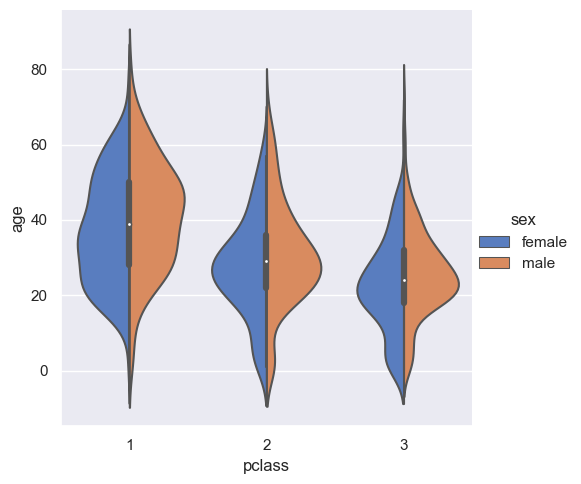

In [307]:
#creating a violin plot through .catplot() and splitting by hue instead of creating different plots.
sns.catplot(kind="violin",data=titanic,x="pclass",y="age",hue="sex",split=True)
plt.show()

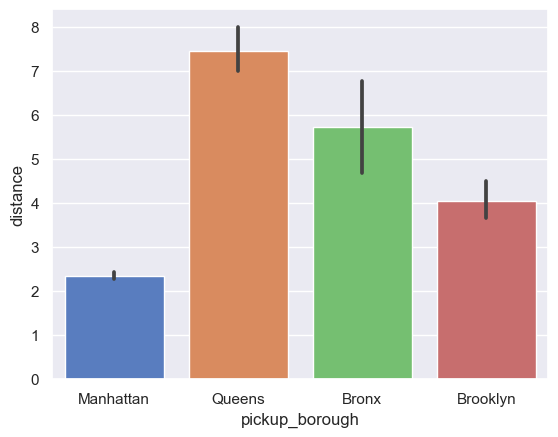

In [308]:
# Barplot, with the estimator set at mean by default
sns.barplot(data=taxis,x="pickup_borough",y="distance")
plt.show()

In [309]:
#We can customize the general appearance of the plots
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

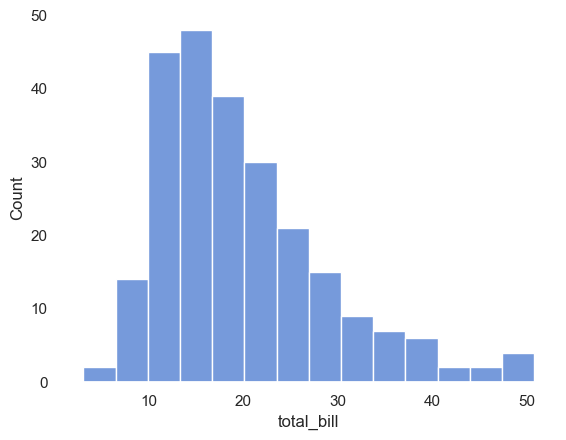

In [310]:
#setting style (global changes)
sns.set_style({'axes.facecolor': 'white'})
sns.histplot(data=tips,x="total_bill")
plt.show()

In [312]:
#view color palete
sns.color_palette("dark")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

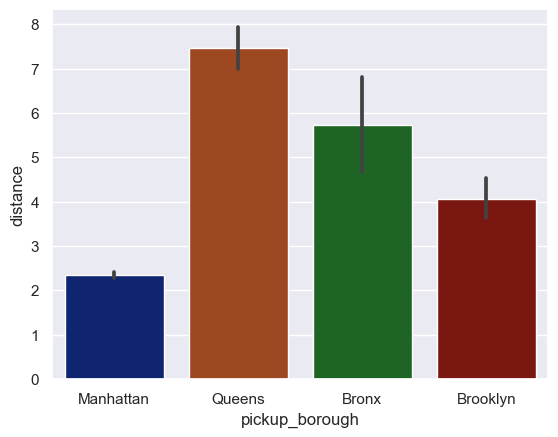

In [313]:
sns.set_style("darkgrid")
sns.set_palette("dark")
sns.barplot(data=taxis,x="pickup_borough",y="distance")
plt.show()